In [1]:
import argparse
from ray.tune import Analysis
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy 
import pdb 

In [2]:
logdir = '/data/petabyte/safe_autonomy/ieee_aero_2022/experiments/docking_2d/expr_20210914_005226'

In [3]:
all_subdirs = next(os.walk(logdir))[1]

In [4]:
all_subdirs

['PPO_DockingEnv_093d2_00001_1_seed=58773_2021-09-14_00-52-29',
 'PPO_DockingEnv_093d2_00006_6_seed=887599_2021-09-14_00-52-29',
 'training_logs',
 'PPO_DockingEnv_093d2_00003_3_seed=166_2021-09-14_00-52-29',
 'PPO_DockingEnv_093d2_00007_7_seed=376759_2021-09-14_00-52-29',
 'PPO_DockingEnv_093d2_00009_9_seed=222634_2021-09-14_00-52-29',
 'PPO_DockingEnv_093d2_00004_4_seed=958191_2021-09-14_00-52-29',
 'PPO_DockingEnv_093d2_00000_0_seed=0_2021-09-14_00-52-29',
 'PPO_DockingEnv_093d2_00005_5_seed=153558_2021-09-14_00-52-29',
 'PPO_DockingEnv_093d2_00002_2_seed=623778_2021-09-14_00-52-29',
 'PPO_DockingEnv_093d2_00008_8_seed=720211_2021-09-14_00-52-29']

In [5]:
# preprocessing logic 

# keep track of all csv files
csv_file_tracker = []
for d in all_subdirs: 
    if d == 'training_logs':
        continue
    else: 
        csv_path = logdir + '/' + d + '/' + 'progress.csv'
        csv_file_tracker.append(csv_path)


In [6]:
data_dfs = [pd.read_csv(csv_file_tracker[i]) for i in range(len(csv_file_tracker))]

Make graphs and visuals of all the data present - use the multiple loop approach from earlier notebook 

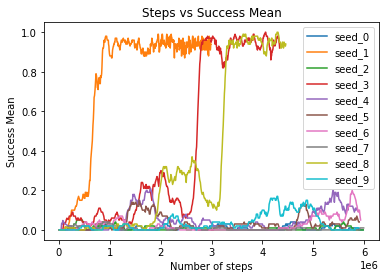

In [7]:
plt.figure()
plt.title('Steps vs Success Mean')
plt.ylabel('Success Mean')
plt.xlabel('Number of steps')

seed = 0
for d in all_subdirs: 
    if d == 'training_logs':
        continue
    else: 
        seed_name = 'seed_' + str(seed)
        csv_path = logdir + '/' + d + '/' + 'progress.csv'
        data = pd.read_csv(csv_path)
        steps = data['timesteps_total']
        success_mean= data['custom_metrics/outcome/success_mean']
        plt.plot(steps,success_mean,label=seed_name)
        seed = seed + 1
plt.legend()


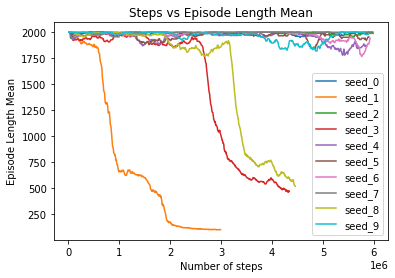

In [8]:
plt.figure()
plt.title('Steps vs Episode Length Mean')
plt.ylabel('Episode Length Mean')
plt.xlabel('Number of steps')

seed = 0
for d in all_subdirs: 
    if d == 'training_logs':
        continue
    else: 
        seed_name = 'seed_' + str(seed)
        csv_path = logdir + '/' + d + '/' + 'progress.csv'
        data = pd.read_csv(csv_path)
        steps = data['timesteps_total']
        success_mean= data['episode_len_mean']
        plt.plot(steps,success_mean,label=seed_name)
        seed = seed + 1

plt.legend()


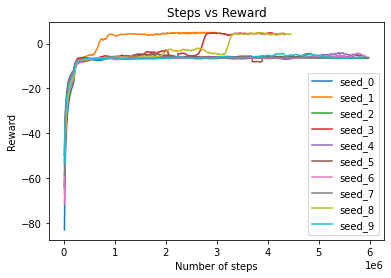

In [9]:
plt.figure()
plt.title('Steps vs Reward')
plt.ylabel('Reward')
plt.xlabel('Number of steps')

seed = 0
for d in all_subdirs: 
    if d == 'training_logs':
        continue
    else: 
        seed_name = 'seed_' + str(seed)
        csv_path = logdir + '/' + d + '/' + 'progress.csv'
        data = pd.read_csv(csv_path)
        steps = data['timesteps_total']
        success_mean= data['episode_reward_mean']
        plt.plot(steps,success_mean,label=seed_name)
        seed = seed + 1

plt.legend()


View DataFrames to find dfs that end around 4*10^6 steps

In [10]:
data_dfs[1]

,episode_reward_max,episode_reward_min,episode_reward_mean,episode_len_mean,episodes_this_iter,num_healthy_workers,timesteps_total,done,episodes_total,training_iteration,...,perf/ram_util_percent,info/learner/default_policy/cur_kl_coeff,info/learner/default_policy/cur_lr,info/learner/default_policy/total_loss,info/learner/default_policy/policy_loss,info/learner/default_policy/vf_loss,info/learner/default_policy/vf_explained_var,info/learner/default_policy/kl,info/learner/default_policy/entropy,info/learner/default_policy/entropy_coeff
0,-18.085920,-106.153344,-66.662097,2001.00,6,6,12006,False,6,1,...,7.587500,0.20,0.00005,0.396965,-0.025559,0.419141,0.904028,0.016914,4.779084,0.0
1,-14.586253,-106.153344,-51.600636,2001.00,6,6,24012,False,12,2,...,7.692857,0.20,0.00005,0.123159,-0.032186,0.151005,0.942787,0.021703,4.763916,0.0
2,-14.586253,-106.153344,-40.462176,2001.00,6,6,36018,False,18,3,...,7.646154,0.30,0.00005,0.240672,-0.019601,0.256483,0.567025,0.012633,4.760189,0.0
3,-12.177172,-106.153344,-34.073436,2001.00,6,6,48024,False,24,4,...,7.597297,0.30,0.00005,0.275764,-0.018352,0.290577,0.490960,0.011796,4.748338,0.0
4,-11.512642,-106.153344,-30.041841,2001.00,6,6,60030,False,30,5,...,7.600000,0.30,0.00005,0.336478,-0.019587,0.351319,0.343022,0.015820,4.735838,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,5.393939,-0.920672,4.813703,102.22,43,6,2971535,False,11409,496,...,7.700000,0.45,0.00005,0.344608,-0.061346,0.398457,0.747108,0.016659,2.682648,0.0
496,5.399662,-0.920672,4.634308,101.10,45,6,2976072,False,11454,497,...,7.700000,0.45,0.00005,0.428402,-0.058545,0.480017,0.720134,0.015399,2.675737,0.0
497,5.399662,-0.862302,4.704154,100.58,46,6,2980691,False,11500,498,...,7.700000,0.45,0.00005,0.346417,-0.061461,0.399427,0.759405,0.018781,2.758957,0.0
498,5.378247,-0.790257,4.828885,101.60,42,6,2985010,False,11542,499,...,7.700000,0.45,0.00005,0.029886,-0.062183,0.084685,0.911983,0.016411,2.654634,0.0


In [11]:
data_dfs[3]

,episode_reward_max,episode_reward_min,episode_reward_mean,episode_len_mean,episodes_this_iter,num_healthy_workers,timesteps_total,done,episodes_total,training_iteration,...,perf/ram_util_percent,info/learner/default_policy/cur_kl_coeff,info/learner/default_policy/cur_lr,info/learner/default_policy/total_loss,info/learner/default_policy/policy_loss,info/learner/default_policy/vf_loss,info/learner/default_policy/vf_explained_var,info/learner/default_policy/kl,info/learner/default_policy/entropy,info/learner/default_policy/entropy_coeff
0,-48.207050,-99.033163,-63.849344,2001.000000,6,6,12006,False,6,1,...,7.593750,0.200,0.00005,0.324407,-0.031593,0.352473,0.900004,0.017635,4.777825,0.0
1,-17.665185,-105.959352,-53.722568,2001.000000,6,6,24012,False,12,2,...,7.700000,0.200,0.00005,0.095962,-0.043587,0.133216,0.965417,0.031660,4.744387,0.0
2,-16.497785,-105.959352,-42.643322,2001.000000,6,6,36018,False,18,3,...,7.650000,0.300,0.00005,0.258519,-0.023362,0.277971,0.513029,0.013035,4.746664,0.0
3,-9.153922,-105.959352,-35.900130,1983.041667,6,6,47593,False,24,4,...,7.597297,0.300,0.00005,0.252005,-0.017314,0.265577,0.411894,0.012471,4.737663,0.0
4,-9.153922,-105.959352,-31.600219,1986.633333,6,6,59599,False,30,5,...,7.600000,0.300,0.00005,0.324753,-0.017972,0.339129,0.378138,0.011985,4.722757,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,5.411757,-2.102182,4.375372,463.230000,12,6,4313256,False,3874,496,...,7.500000,0.675,0.00005,0.137301,-0.043307,0.173093,0.884456,0.011132,2.670125,0.0
496,5.411757,-1.743904,4.362441,466.100000,12,6,4318768,False,3886,497,...,7.500000,0.675,0.00005,0.209651,-0.044334,0.247963,0.844599,0.008921,2.626629,0.0
497,5.411757,-1.743904,4.239294,464.600000,12,6,4324791,False,3898,498,...,7.500000,0.675,0.00005,0.214738,-0.046540,0.253930,0.822711,0.010884,2.500805,0.0
498,5.411757,-2.284935,4.188369,477.660000,12,6,4330794,False,3910,499,...,7.500000,0.675,0.00005,0.150914,-0.046070,0.191267,0.868472,0.008471,2.539498,0.0


In [12]:
data_dfs[8]

,episode_reward_max,episode_reward_min,episode_reward_mean,episode_len_mean,episodes_this_iter,num_healthy_workers,timesteps_total,done,episodes_total,training_iteration,...,perf/ram_util_percent,info/learner/default_policy/cur_kl_coeff,info/learner/default_policy/cur_lr,info/learner/default_policy/total_loss,info/learner/default_policy/policy_loss,info/learner/default_policy/vf_loss,info/learner/default_policy/vf_explained_var,info/learner/default_policy/kl,info/learner/default_policy/entropy,info/learner/default_policy/entropy_coeff
0,-30.682950,-119.527581,-53.448189,2001.00,6,6,12006,False,6,1,...,7.593333,0.20,0.00005,0.381500,-0.031722,0.409837,0.921484,0.016925,4.778007,0.0
1,-19.027175,-119.527581,-44.433108,2001.00,6,6,24012,False,12,2,...,7.692308,0.20,0.00005,0.134589,-0.036798,0.166635,0.887825,0.023759,4.754890,0.0
2,-16.294055,-119.527581,-36.458477,2001.00,6,6,36018,False,18,3,...,7.671429,0.30,0.00005,0.138215,-0.021706,0.155922,0.736619,0.013330,4.758663,0.0
3,-10.627062,-119.527581,-32.802537,2001.00,6,6,48024,False,24,4,...,7.600000,0.30,0.00005,0.078805,-0.030666,0.104598,0.942893,0.016242,4.739712,0.0
4,-10.627062,-119.527581,-29.102316,2001.00,6,6,60030,False,30,5,...,7.600000,0.30,0.00005,0.311732,-0.017673,0.325694,0.423545,0.012372,4.741544,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,5.544034,-1.807273,4.178733,548.77,12,6,4430227,False,3344,496,...,7.500000,0.45,0.00005,0.105011,-0.045071,0.143989,0.910931,0.013540,2.115183,0.0
496,5.385673,-1.807273,4.140590,532.88,13,6,4436514,False,3357,497,...,7.328571,0.45,0.00005,0.115805,-0.042367,0.153185,0.899622,0.011081,2.260009,0.0
497,5.385673,-1.807273,4.125181,526.28,14,6,4443650,False,3371,498,...,7.100000,0.45,0.00005,0.127510,-0.036173,0.159125,0.893732,0.010130,2.303394,0.0
498,5.316990,-1.807273,4.072032,524.19,12,6,4450160,False,3383,499,...,7.137500,0.45,0.00005,-0.023960,-0.047565,0.017856,0.988090,0.012775,2.258031,0.0


In [13]:
# find the set of unique x values i.e. timestep data 
key_timesteps = 'timesteps_total'
timesteps_total_track = []
for ds in data_dfs: 
    for i in range(ds.shape[0]):                
        timestep_total = ds.iloc[[i]][key_timesteps][i]
        timesteps_total_track.append(timestep_total)

timesteps = np.array(timesteps_total_track)
unique_timesteps = np.unique(timesteps) 

In [14]:
#view intermediate results 
print(unique_timesteps)
print(unique_timesteps.max())
print(unique_timesteps.min())
print("range:",unique_timesteps.max() - unique_timesteps.min())

[  12006   24012   36018 ... 5973618 5977794 5985286]
5985286
12006
range: 5973280


In [15]:
# interpolate each experiment's data over that set of unique x values 

In [16]:
clipped_timesteps = data_dfs[8]['timesteps_total']

In [17]:
from scipy import interpolate

In [18]:
key_timesteps = 'timesteps_total'
key_eps_len_mean = 'episode_len_mean'
key_success_mean = 'custom_metrics/outcome/success_mean'
key_eps_reward_mean = 'episode_reward_mean'


In [36]:
timesteps_total_track = []
episode_len_mean_track = []
success_mean_track = []
eps_reward_mean_track = []

# dont need to walk through step by step , can just grab columns 
for ds in data_dfs: 
    for i in range(ds.shape[0]):                
        timestep_total = ds[key_timesteps]
        episode_len_mean = ds[key_eps_len_mean]
        success_mean = ds[key_success_mean]
        reward_mean = ds[key_eps_reward_mean]
        
        # interpolation functions
        func_time_v_eps_len = interpolate.interp1d(timestep_total,episode_len_mean,fill_value='extrapolate')
        func_time_v_success = interpolate.interp1d(timestep_total,success_mean,fill_value='extrapolate')
        func_time_v_reward = interpolate.interp1d(timestep_total,reward_mean,fill_value='extrapolate')
        interp_eps_len = func_time_v_eps_len(clipped_timesteps)
        interp_success = func_time_v_success(clipped_timesteps)
        interp_reward = func_time_v_reward(clipped_timesteps)
        
        for i in clipped_timesteps:
            timesteps_total_track.append(i)
        for i in interp_eps_len: 
            episode_len_mean_track.append(i)
        for i in interp_success: 
            success_mean_track.append(i)
        for i in interp_reward: 
            eps_reward_mean_track.append(i)
        
        #timesteps_total_track.append(np.array(clipped_timesteps))
        #episode_len_mean_track.append(np.array(interp_eps_len))
        #success_mean_track.append(np.array(interp_success))
        #eps_reward_mean_track.append(np.array(interp_reward))
        

In [43]:
timesteps_total_v_episode_len_mean = pd.DataFrame()
timesteps_total_v_episode_len_mean[key_timesteps] = timesteps_total_track
timesteps_total_v_episode_len_mean[key_eps_len_mean] = episode_len_mean_track

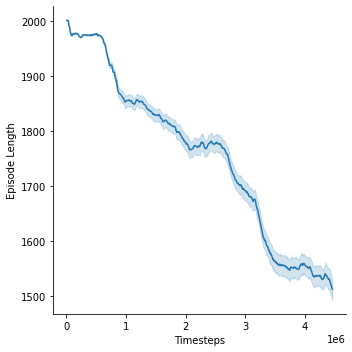

In [44]:
episode_mean_len_plot = sns.relplot(data=timesteps_total_v_episode_len_mean,x='timesteps_total',y='episode_len_mean',kind='line')
episode_mean_len_plot.set_axis_labels("Timesteps","Episode Length")


In [45]:
timesteps_total_v_success_mean = pd.DataFrame()
timesteps_total_v_success_mean[key_timesteps] = timesteps_total_track
timesteps_total_v_success_mean['success_mean'] = success_mean_track

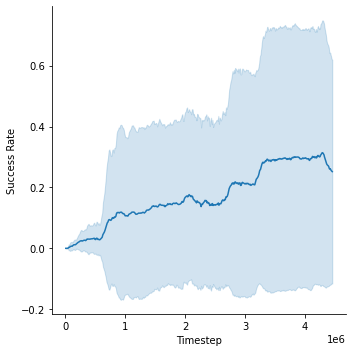

In [46]:
success_mean_plot = sns.relplot(data=timesteps_total_v_success_mean,x='timesteps_total',y='success_mean',ci='sd',kind='line')
success_mean_plot.set_axis_labels("Timestep","Success Rate") 

In [47]:
timesteps_total_v_episode_reward_mean = pd.DataFrame()
timesteps_total_v_episode_reward_mean[key_timesteps] = timesteps_total_track
timesteps_total_v_episode_reward_mean['episode_reward_mean'] = eps_reward_mean_track

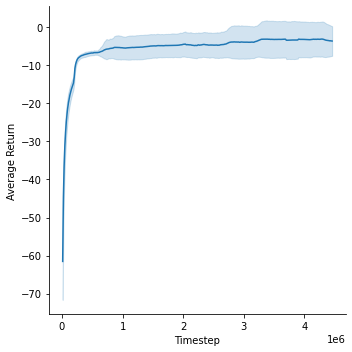

In [48]:
reward_plot = sns.relplot(data=timesteps_total_v_episode_reward_mean,x='timesteps_total',y='episode_reward_mean',ci='sd',kind='line')
reward_plot.set_axis_labels("Timestep","Average Return")

In [51]:
episode_mean_len_plot.savefig('docking2d_eps_len_plot_dpi1200.png',dpi=1200)